In [1]:
import math
import numpy as np
from scipy import signal
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
import fuzzy_reg

### 1. В качестве управляемой системы используйте тот же обратный маятник, который моделировали в работе 3. Используйте при создании нечёткого регулятора указанное число лингвистических переменных: 2 входных, 4 выходных

In [3]:
# создаём управляемую систему
dT = 0.01
TotalTime = 5
moments_num = int(TotalTime/dT) + 1
Tin = np.linspace(0, TotalTime, moments_num)

m = 1
L = 1
g = 9.81

A, B, C, D = signal.tf2ss([1], [m*L**2, 0, -0.98*m*g*L])
sys_tf = signal.StateSpace(A, B, C, D)

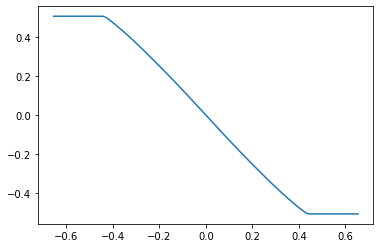

In [4]:
# создаём нечёткий регулятор
fc = fuzzy_reg.FuzzyController()
# выведем зависимость выхода от входа
fc.plot()

### 2. Задайте функции принадлежности, описывающие каждую входную и выходную лингвистическую переменную.

### 3. Задайте правила работы нечёткого компонента.

### 4. Оцените правильность работы нечёткого регулятора, передавая на него разные комбинации входных сигналов. Постройте зависимость его выхода от какого-либо входного параметра при фиксированных остальных.

### 5. Реализуйте требуемую систему управления. Является ли её реакция на сигнал ограниченной во времени и величине?

In [5]:
# задаём начальные условия
init_angle = 5.0 / 180.0 * math.pi
out_pos = np.zeros(moments_num + 1)
out_pos[0] = init_angle
curr_state = [0, out_pos[0]]

In [6]:
# для каждого момента времени
for i in range(moments_num):
    # вычислим сигнал нечёткого регулятора
    inp = fc.calc(curr_state[1] * 10) # передаём угол, а не переменную состояния
    # вычислим выход управляемой системы по входу
    Tout,yout,xout = signal.lsim(sys_tf, [inp, inp], [0, dT], X0=curr_state)
    curr_state = xout[-1]
    out_pos[i+1] = yout[-1]

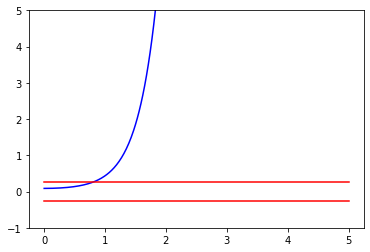

In [7]:
ax = plt.axes()
ax.set_ylim([-1, 5])

plt.plot(Tin, out_pos[:-1],'b')
limit = 15 / 180.0 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()

### 6. Постарайтесь настроить нечёткий регулятор так, чтобы он приводил маятник в вертикальное положение за достаточно малое время при любых отклонениях от равновесия в пределах 15°. Для некоторых комбинаций лингвистических переменных и управляемых систем корректная настройка может быть затруднена, поэтому для сдачи достаточно продемонстрировать верную работу нечёткого регулятора совместно с управляемой системой.

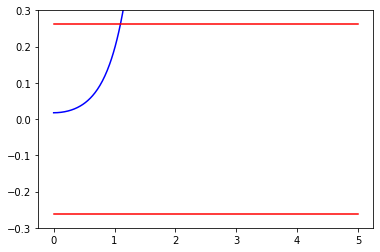

In [34]:
zero_input = np.zeros(Tin.shape)
start_pos = 1 / 180.0 * np.pi # начнём с позиции в 1°
Tout, yout, xout = signal.lsim(sys_tf, zero_input, 
                               Tin, X0=[0, start_pos])

ax = plt.axes()
ax.set_ylim([-.3, .3])

plt.plot(Tout, yout, 'b')

# покажем предельные допустимые отклонения красными линиями
limit = 15 / 180.0 * np.pi

plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')

plt.show()